In [16]:
import pandas as pd
import rivalry1 as rv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
#ip = pd.Series(p)
#ip.to_pickle('trex.pkl')
#ip

In [18]:
#from initialparameters.txt
#p = {}
#p['beta']=1.7
#p['gamma'] = 3.52
#p['tau_a']=1248.0
#p['tau_u']=10
#p['sigma']=0.4
#p['mu']=0
#p['ks']=3
#p['kc']=0.1
#p['kb'] = 0.109369

#S = [p[5] + p[6]*C;p[5] - p[6]*C;p[7]]

In [19]:
p = pd.read_pickle('trex.pkl')

In [20]:
tot=500000
tpre=6000
dt = 1

In [30]:
#unpack fixed parameters
param = p
beta = param['beta']
#alpha = param['alpha']
gamma = param['gamma']
tau_a = param['tau_a']
sigma = param['sigma']
mu = param['mu']
tau_u = param['tau_u']

#input stimulus
contrast = [0.0,1.0,2.0,3.0,4.0]
r = contrast[2]
ks = param['ks']
kc = param['kc']
kb = param['kb']
k1 = rv.stimulus(ks,kc,r)
k2 = rv.stimulus(ks,kc,-r)#weaker stimulus

tf = tot
equil = tpre
totaltime= tf + equil

#system variables
U = np.random.uniform(0,1,(2,2))
A = np.random.uniform(0,1,(2,1))
Z = np.random.uniform(0,1,(2,1))

u1 = []
u2 = []
a1 = []
a2 = []
z1 = []
z2 = []
t = []
i=0

In [31]:
p

beta        1.700000
gamma       3.520000
kb          0.109369
kc          0.100000
ks          3.000000
mu          0.000000
sigma       0.400000
tau_a    1248.000000
tau_u      10.000000
dtype: float64

In [32]:
print U
print A
print Z

[[ 0.05715235  0.63497754]
 [ 0.09216408  0.76519565]]
[[ 0.86486897]
 [ 0.4641028 ]]
[[ 0.23497645]
 [ 0.21030617]]


In [33]:
while i < totaltime:
    i += 1
    t.append(i*dt)
    stim_on = int(equil<i)
    S1 = k1*stim_on
    S2 = k2*stim_on
    Z[0,0] = Z[0,0] -dt*(Z[0,0] + np.sqrt(dt)*sigma*np.random.randn())
    Z[1,0] = Z[1,0] -dt*(Z[1,0] + np.sqrt(dt)*sigma*np.random.randn())

    U[0,1] = U[0,0]+dt*(-U[0,0]+rv.gain_pl_sqrt(kb+S1 - beta*U[1,0] -gamma*A[0,0] + Z[0,0]*(1+mu*U[1,0])))/tau_u
    U[1,1] = U[1,0]+dt*(-U[1,0]+rv.gain_pl_sqrt(kb+S2 - beta*U[0,0] -gamma*A[1,0] + Z[1,0]*(1+mu*U[0,0])))/tau_u
    U[0,0] = U[0,1]
    U[1,0] = U[1,1]

    A[0,0] = A[0,0] + dt*(-A[0,0] + U[0,0])/tau_a
    A[1,0] = A[1,0] + dt*(-A[1,0] + U[1,0])/tau_a

    u1.append(U[0,0])
    u2.append(U[1,0])
    a1.append(A[0,0])
    a2.append(A[1,0])
    z1.append(Z[0,0])
    z2.append(Z[1,0])

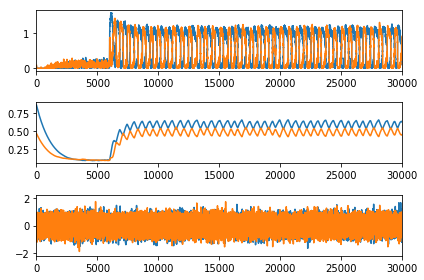

In [34]:
xmax=30000
fig, axs = plt.subplots(3,1)
axs[0].plot(t,u1,t,u2)
axs[0].set_xlim(0,xmax)
axs[1].plot(t,a1,t,a2)
axs[1].set_xlim(0,xmax)
axs[2].plot(t,z1,t,z2)
axs[2].set_xlim(0,xmax)
fig.tight_layout()

In [35]:
DOM1 = []
DOM2 = []
LEADER = []

In [36]:
td1 = rv.dominance(t,u1,u2,equil)
td2 = rv.dominance(t,u2,u1,equil)

DOM1.extend(td1)
DOM2.extend(td2)

TD1 = np.array(DOM1)
TD2 = np.array(DOM2)

In [37]:
FINAL_DATA = {}
#FINAL_DATA['FIRST_EPOCH_PROB'] = rv.prob_seq(LEADER,1)
FINAL_DATA['MEAN_U1'] = np.mean(TD1)
FINAL_DATA['MEAN_U2'] = np.mean(TD2)
FINAL_DATA['SD_U1'] = np.std(TD1)
FINAL_DATA['SD_U2'] = np.std(TD2)
FINAL_DATA['CV_U1'] = FINAL_DATA['SD_U1']/FINAL_DATA['MEAN_U1']
FINAL_DATA['CV_U2'] = FINAL_DATA['SD_U2']/FINAL_DATA['MEAN_U2']

In [38]:
FINAL_DATA

{'CV_U1': 0.70102877497092031,
 'CV_U2': 0.69719333320730414,
 'MEAN_U1': 235.01686340640811,
 'MEAN_U2': 187.78481012658227,
 'SD_U1': 164.75358385130238,
 'SD_U2': 130.92231769785261}

In [13]:
import model as model

In [14]:
#pmi = model.run(p,1,500)

In [15]:
pm3 = model.run(p3,1,200)

In [15]:
#pmi['CV_U1']=pmi['SD_U1']/pmi['MEAN_U1']
#pmi['CV_U2']=pmi['SD_U2']/pmi['MEAN_U2']
#pmi

In [16]:
pm3['CV_U1']=pm3['SD_U1']/pm3['MEAN_U1']
pm3['CV_U2']=pm3['SD_U2']/pm3['MEAN_U2']
pm3

,COUNTS_U1,COUNTS_U2,FIRST_EPOCH_PROB_U1,FIRST_EPOCH_PROB_U2,MEAN_U1,MEAN_U2,SD_U1,SD_U2,CV_U1,CV_U2
0,101.0,99.0,0.505,0.495,1514.666667,1518.666667,647.938774,643.569694,0.427776,0.423773
20,143.0,57.0,0.715,0.285,1464.033520,1276.133333,846.041000,732.608516,0.577884,0.574085
40,177.0,23.0,0.885,0.115,1717.650307,1282.908537,817.860298,602.686120,0.476151,0.469781
60,187.0,13.0,0.935,0.065,1868.531250,1191.031056,942.016978,600.577842,0.504148,0.504250
80,200.0,0.0,1.000,0.000,2052.194805,1118.941935,1063.441376,564.389813,0.518197,0.504396


In [17]:
p3

alpha       0.000067
beta        0.943724
gamma       1.347079
kb          0.109861
kc          0.003166
ks          0.178345
mu          1.067869
sigma       0.031642
tau_a    2060.690485
tau_u       9.540702
Name: 184, dtype: float64